In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from pprint import pprint
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import levene, pearsonr
import statsmodels.stats.api as sms
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data.csv")

This is *an* evolution of preferences, produced with the model initiated with a map of width $N = 300$, that is, having $90000$ voters, having uniformly distributed initial preferences, carried out $300$ generations.

In [4]:
data

,Unnamed: 0,E,D,C,B,A,O,A',B',C',D',E',outcomes,str_out_det
0,0,8206,8289,8250,8072,8188,8178,8136,8141,8167,8290,8083,"{'tie': 0, 'left_suc_strategic': 0, 'left_unsu...","{'left_suc_strategic': {-9: 0, -7: 0, -5: 0, -..."
1,1,13272,7547,7153,6863,6385,8178,6401,6547,7015,7315,13324,"{'tie': 826, 'left_suc_strategic': 1463, 'left...","{'left_suc_strategic': {-9: 0, -7: 165, -5: 27..."
2,2,15053,7209,6718,6447,5926,8178,5691,5981,6648,7007,15142,"{'tie': 664, 'left_suc_strategic': 959, 'left_...","{'left_suc_strategic': {-9: 0, -7: 103, -5: 22..."
3,3,15501,7161,6652,6349,5738,8178,5545,5835,6524,6861,15656,"{'tie': 449, 'left_suc_strategic': 602, 'left_...","{'left_suc_strategic': {-9: 0, -7: 73, -5: 127..."
4,4,15618,7174,6591,6364,5684,8178,5503,5909,6512,6849,15618,"{'tie': 368, 'left_suc_strategic': 375, 'left_...","{'left_suc_strategic': {-9: 0, -7: 38, -5: 87,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,10948,8098,7610,7359,6714,8178,6881,7244,7792,8138,11038,"{'tie': 55, 'left_suc_strategic': 0, 'left_uns...","{'left_suc_strategic': {-9: 0, -7: 0, -5: 0, -..."
296,296,10948,8098,7610,7359,6714,8178,6881,7244,7792,8138,11038,"{'tie': 55, 'left_suc_strategic': 0, 'left_uns...","{'left_suc_strategic': {-9: 0, -7: 0, -5: 0, -..."
297,297,10948,8098,7610,7359,6714,8178,6881,7244,7792,8138,11038,"{'tie': 55, 'left_suc_strategic': 0, 'left_uns...","{'left_suc_strategic': {-9: 0, -7: 0, -5: 0, -..."
298,298,10948,8098,7610,7359,6714,8178,6881,7244,7792,8138,11038,"{'tie': 55, 'left_suc_strategic': 0, 'left_uns...","{'left_suc_strategic': {-9: 0, -7: 0, -5: 0, -..."


# Distribution of the strategic votes

In [6]:
# Let's print out some random generation to see what it looks like.

In [7]:
# We can, for example, look at the total number of strategic votes of each types.

In [8]:
data.str_out_det[10]

"{'left_suc_strategic': {-9: 0, -7: 15, -5: 37, -3: 43, -1: 35}, 'left_unsuc_best_try': {-9: 1225, -7: 163, -5: 143, -3: 130, -1: 131}, 'right_suc_strategic': {1: 32, 3: 47, 5: 18, 7: 18, 9: 0}, 'right_unsuc_best_try': {1: 129, 3: 135, 5: 144, 7: 130, 9: 1257}}"

In [9]:
a = ast.literal_eval(data.str_out_det[10]); a

{'left_suc_strategic': {-9: 0, -7: 15, -5: 37, -3: 43, -1: 35},
 'left_unsuc_best_try': {-9: 1225, -7: 163, -5: 143, -3: 130, -1: 131},
 'right_suc_strategic': {1: 32, 3: 47, 5: 18, 7: 18, 9: 0},
 'right_unsuc_best_try': {1: 129, 3: 135, 5: 144, 7: 130, 9: 1257}}

In [10]:
a["left_suc_strategic"]

{-9: 0, -7: 15, -5: 37, -3: 43, -1: 35}

In [11]:
a["left_suc_strategic"][-9]

0

In [12]:
lefts = [a["left_suc_strategic"], a["left_unsuc_best_try"]]; lefts

[{-9: 0, -7: 15, -5: 37, -3: 43, -1: 35},
 {-9: 1225, -7: 163, -5: 143, -3: 130, -1: 131}]

In [13]:
[[i[k] for k in i] for i in lefts]

[[0, 15, 37, 43, 35], [1225, 163, 143, 130, 131]]

In [14]:
[sum(x) for x in zip(*[[i[k] for k in i] for i in lefts])]

[1225, 178, 180, 173, 166]

In [15]:
lefts_sums = []

In [16]:
for i in range(len(data.str_out_det)):
    a = ast.literal_eval(data.str_out_det[i])
    lefts = [a["left_suc_strategic"], a["left_unsuc_best_try"]]
    lefts_sums.append([sum(x) for x in zip(*[[i[k] for k in i] for i in lefts])])

In [17]:
lefts_sums

[[0, 0, 0, 0, 0],
 [1079, 1255, 1371, 1495, 1769],
 [2290, 880, 913, 928, 905],
 [2368, 572, 596, 607, 638],
 [2317, 488, 471, 472, 482],
 [2283, 385, 357, 387, 389],
 [1980, 319, 284, 299, 308],
 [1783, 256, 236, 252, 232],
 [1520, 209, 232, 204, 216],
 [1354, 193, 181, 187, 188],
 [1225, 178, 180, 173, 166],
 [1099, 174, 128, 155, 141],
 [970, 144, 128, 136, 112],
 [875, 130, 102, 125, 117],
 [823, 97, 98, 100, 99],
 [671, 96, 83, 89, 108],
 [612, 100, 88, 89, 78],
 [579, 73, 71, 74, 74],
 [515, 58, 67, 72, 62],
 [467, 70, 56, 77, 67],
 [379, 63, 82, 61, 59],
 [381, 68, 64, 51, 47],
 [355, 51, 60, 67, 42],
 [313, 58, 51, 59, 44],
 [285, 37, 61, 46, 57],
 [307, 59, 42, 45, 34],
 [264, 43, 39, 51, 34],
 [268, 44, 41, 38, 43],
 [232, 47, 49, 45, 32],
 [222, 23, 29, 27, 35],
 [204, 26, 34, 34, 28],
 [179, 41, 41, 28, 32],
 [184, 35, 33, 28, 33],
 [176, 38, 30, 31, 20],
 [165, 25, 25, 22, 38],
 [171, 29, 33, 25, 25],
 [162, 25, 29, 33, 30],
 [137, 24, 18, 26, 23],
 [151, 24, 33, 20, 29],


In [18]:
lefts_sums_total = [sum(x) for x in zip(*lefts_sums)]; lefts_sums_total

[35812, 7778, 7754, 7987, 8045]

In [19]:
rights_sums = []

In [20]:
for i in range(len(data.str_out_det)):
    a = ast.literal_eval(data.str_out_det[i])
    rights = [a["right_suc_strategic"], a["right_unsuc_best_try"]]
    rights_sums.append([sum(x) for x in zip(*[[i[k] for k in i] for i in rights])])

In [21]:
rights_sums_total = [sum(x) for x in zip(*rights_sums)]; rights_sums_total

[7846, 7916, 7846, 7679, 35985]

In [22]:
sums_total = lefts_sums_total + rights_sums_total; sums_total

[35812, 7778, 7754, 7987, 8045, 7846, 7916, 7846, 7679, 35985]

In [23]:
prefs = [-9, -7, -5, -3, -1, 1, 3, 5, 7, 9]

In [24]:
list(map(str, prefs))

['-9', '-7', '-5', '-3', '-1', '1', '3', '5', '7', '9']

<BarContainer object of 10 artists>

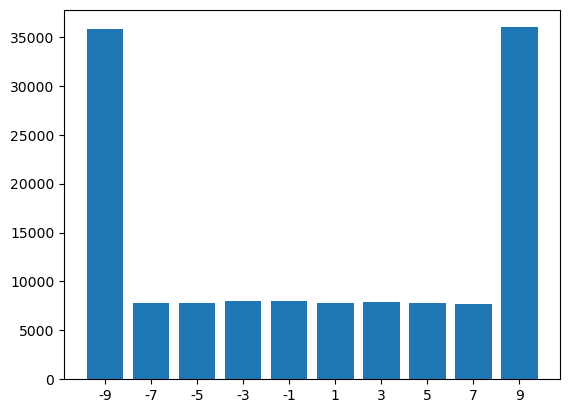

In [25]:
plt.bar(list(map(str,prefs)), sums_total)

# Analysis
We see that **median** voters have a **strong** tendency to vote strategically. Also, the tendency quickly decreases with going towards radical preferences.

In [27]:
data.outcomes[10]

"{'tie': 121, 'left_suc_strategic': 130, 'left_unsuc_best_try': 1792, 'left_unsuc_sincere': 1765, 'left_unsuc_random': 1795, 'left_winning_sincere': 39934, 'right_suc_strategic': 115, 'right_unsuc_best_try': 1795, 'right_unsuc_sincere': 1864, 'right_unsuc_random': 1876, 'right_winning_sincere': 38044}"

In [28]:
data['outcomes'] = data['outcomes'].apply(ast.literal_eval)

In [29]:
from matplotlib.figure import Figure

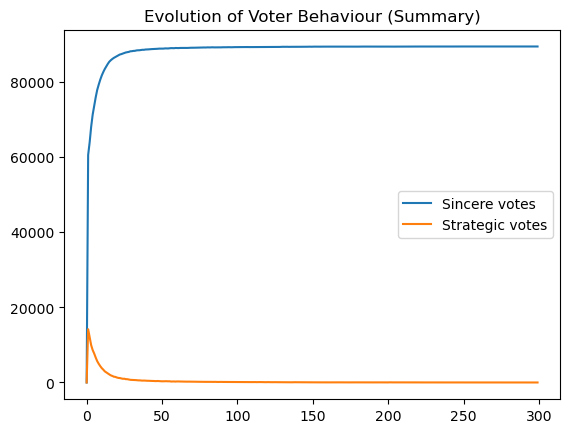

In [30]:
fig = Figure()
ax = fig.subplots()
tie = [gen["tie"] for gen in data.outcomes]
left_winning_sincere = [gen["left_winning_sincere"] for gen in data.outcomes]
left_unsuc_sincere = [gen["left_unsuc_sincere"] for gen in data.outcomes]
right_winning_sincere = [gen["right_winning_sincere"] for gen in data.outcomes]
right_unsuc_sincere = [gen["right_unsuc_sincere"] for gen in data.outcomes]
sincere_list = [tie, left_winning_sincere, left_unsuc_sincere,
                right_winning_sincere, right_unsuc_sincere]

left_suc_strategic = [gen["left_suc_strategic"] for gen in data.outcomes]
left_unsuc_best_try = [gen["left_unsuc_best_try"] for gen in data.outcomes]
right_suc_strategic = [gen["right_suc_strategic"] for gen in data.outcomes]
right_unsuc_best_try = [gen["right_unsuc_best_try"] for gen in data.outcomes]
strategic_list = [left_suc_strategic, left_unsuc_best_try,
                  right_suc_strategic, right_unsuc_best_try]

sincere = [sum(i) for i in zip(*sincere_list)]
strategic = [sum(i) for i in zip(*strategic_list)]

ax.plot(sincere, label="Sincere votes")
ax.plot(strategic, label="Strategic votes")
ax.set_title("Evolution of Voter Behaviour (Summary)")
ax.legend()
fig

In [31]:
totals = data['outcomes'].apply(pd.Series).sum()

In [32]:
totals_df = pd.DataFrame(list(totals.items()), columns=['Oy Çeşitleri', 'Miktar'])

# DataFrame'in ilk birkaç satırını kontrol etme
print(totals_df)

             Oy Çeşitleri    Miktar
0                     tie     21057
1      left_suc_strategic      7912
2     left_unsuc_best_try     59464
3      left_unsuc_sincere     59559
4       left_unsuc_random     60071
5    left_winning_sincere  13252460
6     right_suc_strategic      7463
7    right_unsuc_best_try     59809
8     right_unsuc_sincere     59728
9      right_unsuc_random     59916
10  right_winning_sincere  13102908


### VOTING TYPES

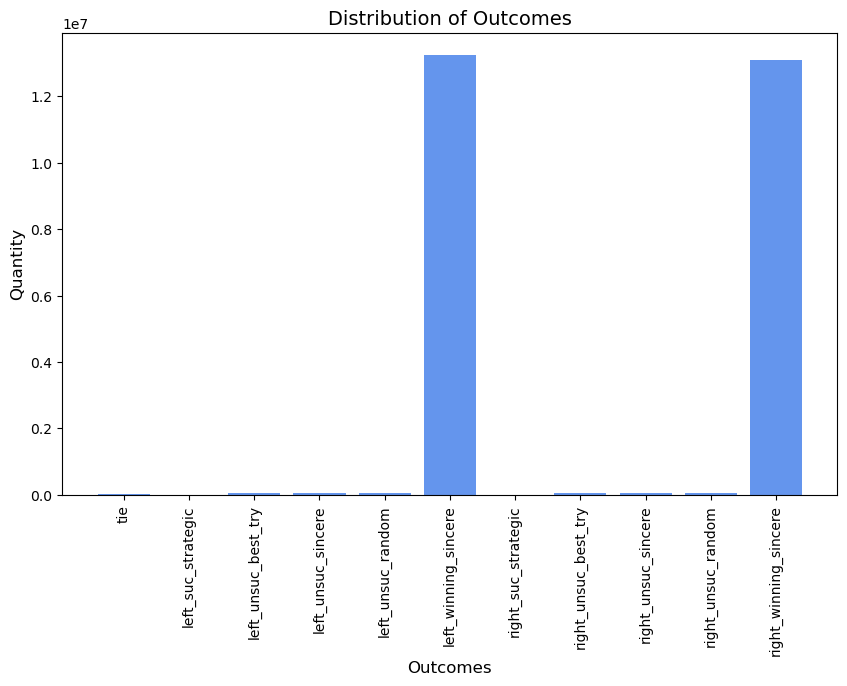

In [34]:
import matplotlib.pyplot as plt

# Bar plot (çubuk grafiği) çizimi
plt.figure(figsize=(10, 6))
plt.bar(totals_df['Oy Çeşitleri'], totals_df['Miktar'], color='cornflowerblue')

# Başlık ve etiketler
plt.title('Distribution of Outcomes', fontsize=14)
plt.xlabel('Outcomes', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Döndürme (eğer etiketler üst üste geliyorsa)
plt.xticks(rotation=90)

# Grafik gösterimi
plt.show()

In [35]:
data

,Unnamed: 0,E,D,C,B,A,O,A',B',C',D',E',outcomes,str_out_det
0,0,8206,8289,8250,8072,8188,8178,8136,8141,8167,8290,8083,"{'tie': 0, 'left_suc_strategic': 0, 'left_unsu...","{'left_suc_strategic': {-9: 0, -7: 0, -5: 0, -..."
1,1,13272,7547,7153,6863,6385,8178,6401,6547,7015,7315,13324,"{'tie': 826, 'left_suc_strategic': 1463, 'left...","{'left_suc_strategic': {-9: 0, -7: 165, -5: 27..."
2,2,15053,7209,6718,6447,5926,8178,5691,5981,6648,7007,15142,"{'tie': 664, 'left_suc_strategic': 959, 'left_...","{'left_suc_strategic': {-9: 0, -7: 103, -5: 22..."
3,3,15501,7161,6652,6349,5738,8178,5545,5835,6524,6861,15656,"{'tie': 449, 'left_suc_strategic': 602, 'left_...","{'left_suc_strategic': {-9: 0, -7: 73, -5: 127..."
4,4,15618,7174,6591,6364,5684,8178,5503,5909,6512,6849,15618,"{'tie': 368, 'left_suc_strategic': 375, 'left_...","{'left_suc_strategic': {-9: 0, -7: 38, -5: 87,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,10948,8098,7610,7359,6714,8178,6881,7244,7792,8138,11038,"{'tie': 55, 'left_suc_strategic': 0, 'left_uns...","{'left_suc_strategic': {-9: 0, -7: 0, -5: 0, -..."
296,296,10948,8098,7610,7359,6714,8178,6881,7244,7792,8138,11038,"{'tie': 55, 'left_suc_strategic': 0, 'left_uns...","{'left_suc_strategic': {-9: 0, -7: 0, -5: 0, -..."
297,297,10948,8098,7610,7359,6714,8178,6881,7244,7792,8138,11038,"{'tie': 55, 'left_suc_strategic': 0, 'left_uns...","{'left_suc_strategic': {-9: 0, -7: 0, -5: 0, -..."
298,298,10948,8098,7610,7359,6714,8178,6881,7244,7792,8138,11038,"{'tie': 55, 'left_suc_strategic': 0, 'left_uns...","{'left_suc_strategic': {-9: 0, -7: 0, -5: 0, -..."


# Distribution of voters

Let's plot the inital distribution.

In [38]:
gen1 = data.iloc[:, 1: 12].iloc[0]

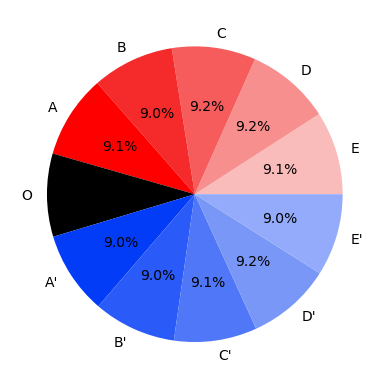

<Figure size 640x480 with 0 Axes>

In [39]:
fig = Figure()
ax = fig.subplots()
colors = ["#fabbbb", "#f78f8f", "#f75c5c", "#f52a2a", "#ff0000", "#000000",
          "#023cf7", "#2a5af7", "#4f77f7", "#7997f7", "#93abfa"]
ax.pie(gen1, labels=gen1.index, colors=colors, autopct='%1.1f%%')
plt.clf()
fig

Let's plot a few more.

In [41]:
gen2 = data.iloc[:, 1: 12].iloc[1]

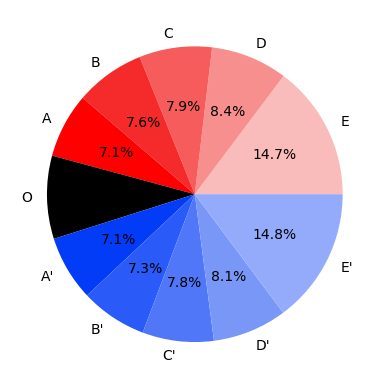

<Figure size 640x480 with 0 Axes>

In [42]:
fig = Figure()
ax = fig.subplots()
colors = ["#fabbbb", "#f78f8f", "#f75c5c", "#f52a2a", "#ff0000", "#000000",
          "#023cf7", "#2a5af7", "#4f77f7", "#7997f7", "#93abfa"]
ax.pie(gen2, labels=gen2.index, colors=colors, autopct='%1.1f%%')
plt.clf()
fig

In [43]:
gen300 = data.iloc[:, 1: 12].iloc[299]

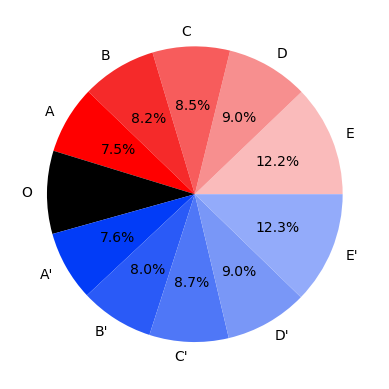

<Figure size 640x480 with 0 Axes>

In [44]:
fig = Figure()
ax = fig.subplots()
colors = ["#fabbbb", "#f78f8f", "#f75c5c", "#f52a2a", "#ff0000", "#000000",
          "#023cf7", "#2a5af7", "#4f77f7", "#7997f7", "#93abfa"]
ax.pie(gen300, labels=gen300.index, colors=colors, autopct='%1.1f%%')
plt.clf()
fig